# 1. Map Coloring Problem

Determine the minimum number of colors needed to color the maps of France and US (separately). Is it possible to color the map of France using only 3 colors? What about coloring the map of USA using only 3 colors? Show the conflict map with colors (example of Australia map is given below).

In [9]:
australia_csp = MapColoringCSP(list('RGB'), """SA: WA NT Q NSW V; NT: WA Q; NSW: Q V; T: """)

usa_csp = MapColoringCSP(list('RGBY'),
                         """WA: OR ID; OR: ID NV CA; CA: NV AZ; NV: ID UT AZ; ID: MT WY UT;
                         UT: WY CO AZ; MT: ND SD WY; WY: SD NE CO; CO: NE KA OK NM; NM: OK TX AZ;
                         ND: MN SD; SD: MN IA NE; NE: IA MO KA; KA: MO OK; OK: MO AR TX;
                         TX: AR LA; MN: WI IA; IA: WI IL MO; MO: IL KY TN AR; AR: MS TN LA;
                         LA: MS; WI: MI IL; IL: IN KY; IN: OH KY; MS: TN AL; AL: TN GA FL;
                         MI: OH IN; OH: PA WV KY; KY: WV VA TN; TN: VA NC GA; GA: NC SC FL;
                         PA: NY NJ DE MD WV; WV: MD VA; VA: MD DC NC; NC: SC; NY: VT MA CT NJ;
                         NJ: DE; DE: MD; MD: DC; VT: NH MA; MA: NH RI CT; CT: RI; ME: NH;
                         HI: ; AK: """)

france_csp = MapColoringCSP(list('RGBY'),
                            """AL: LO FC; AQ: MP LI PC; AU: LI CE BO RA LR MP; BO: CE IF CA FC RA
                            AU; BR: NB PL; CA: IF PI LO FC BO; CE: PL NB NH IF BO AU LI PC; FC: BO
                            CA LO AL RA; IF: NH PI CA BO CE; LI: PC CE AU MP AQ; LO: CA AL FC; LR:
                            MP AU RA PA; MP: AQ LI AU LR; NB: NH CE PL BR; NH: PI IF CE NB; NO:
                            PI; PA: LR RA; PC: PL CE LI AQ; PI: NH NO CA IF; PL: BR NB CE PC; RA:
                            AU BO FC PA LR""")



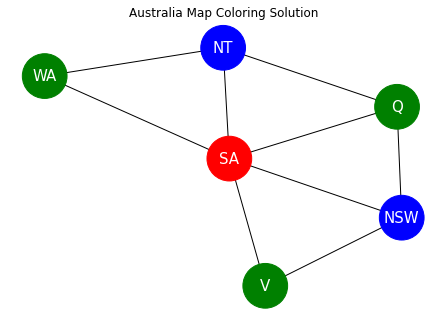

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the Australia CSP
# australia_csp = MapColoringCSP(
#     list('RGB'),
#     """SA: WA NT Q NSW V; NT: WA Q; NSW: Q V; T: """
# )

# Solve the CSP using backtracking search
solution = backtracking_search(australia_csp)

# Define a function to visualize the solution
def visualize_australia_csp(solution):
    # Define the regions and neighbors of Australia
    G = nx.Graph()
    regions = {
        "WA": {"neighbors": ["NT", "SA"]},
        "NT": {"neighbors": ["WA", "SA", "Q"]},
        "SA": {"neighbors": ["WA", "NT", "Q", "NSW", "V"]},
        "Q": {"neighbors": ["NT", "SA", "NSW"]},
        "NSW": {"neighbors": ["Q", "SA", "V"]},
        "V": {"neighbors": ["SA", "NSW"]},
        # "T": {"neighbors": []}
    }

    # Add nodes to the graph
    for region in regions:
        G.add_node(region)

    # Add edges to the graph
    for region, data in regions.items():
        for neighbor in data["neighbors"]:
            G.add_edge(region, neighbor)

    # Map solution values to actual colors
    color_map = {'R': 'red', 'G': 'green', 'B': 'blue'}
    colors = [color_map[solution[region]] for region in G.nodes]

    # Draw the graph with colors from the solution
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2000, font_color='white', font_size=15, edge_color='black')
    plt.title("Australia Map Coloring Solution")
    plt.show()

# Visualize the solution if found
if solution:
    visualize_australia_csp(solution)
else:
    print("No solution found.")


# N-Queens Problem

What is the largest value of N that can be solved on your computer in at-most 1 minute? Measure the time taken to solve N-Queens problem and plot it as a function of N from N = 4 to the largest N you found earlier. Use the code from csp.ipynb to complete this exercise.


In [8]:
from csp import *
n=8
n_queens = NQueensCSP(n)
solution = min_conflicts(n_queens)